# Chapter 2. Visualising Time Series Data with Python

In this chapter, we present several visualization methods for plotting univariate time series data, including:
- Time Series Line Plot;
- Hist Plot & Density Plot;
- Box Plot & Violin Plot;
- Heat Map;
- Lag Plot;
- Autocorrelation Plot.

## Data Description  


The data we used in this section depicts the minmum daily temperature in Melbourne, Australia between 1981 and 1990,measured in degrees Celsius (℃). The data source is the Australian Bureau of Meteorology, with a total of 3650 observations.

## Python packages used in our lesson
In this tutorial, we will work with four powerful Python packages: **Pandas, Matplotlib, Statsmodels and Seaborn**. All four packages have extensive online documentation, we have provided the related resources for learning below.

- [Matplotlib Documentation](https://matplotlib.org/stable/gallery/index.html)
- [Seaborn API Reference](https://seaborn.pydata.org/api.html)
- [Statsmodel API Reference](https://www.statsmodels.org/stable/api.html)
- [Pandas Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html)

## Operation Steps
### Step 1. Load data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)    # Ignore all the future warning
warnings.filterwarnings('ignore', category=UserWarning)     # Ignore all the user warning

In [3]:
TSData = pd.read_csv(r'./data/visual.csv')
TSData.head()

,Date,Temp
0,1981-1-1,20.7
1,1981-1-2,17.9
2,1981-1-3,18.8
3,1981-1-4,14.6
4,1981-1-5,15.8


### Step2. Time series line plot

Line plot is the most common visualization approach to uncover **trends** and **periodic patterns** in time series data.<br>  


See the [matplotlib.axes.Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) for more infomation.

Our example data exhibits a noticeable periodic pattern.

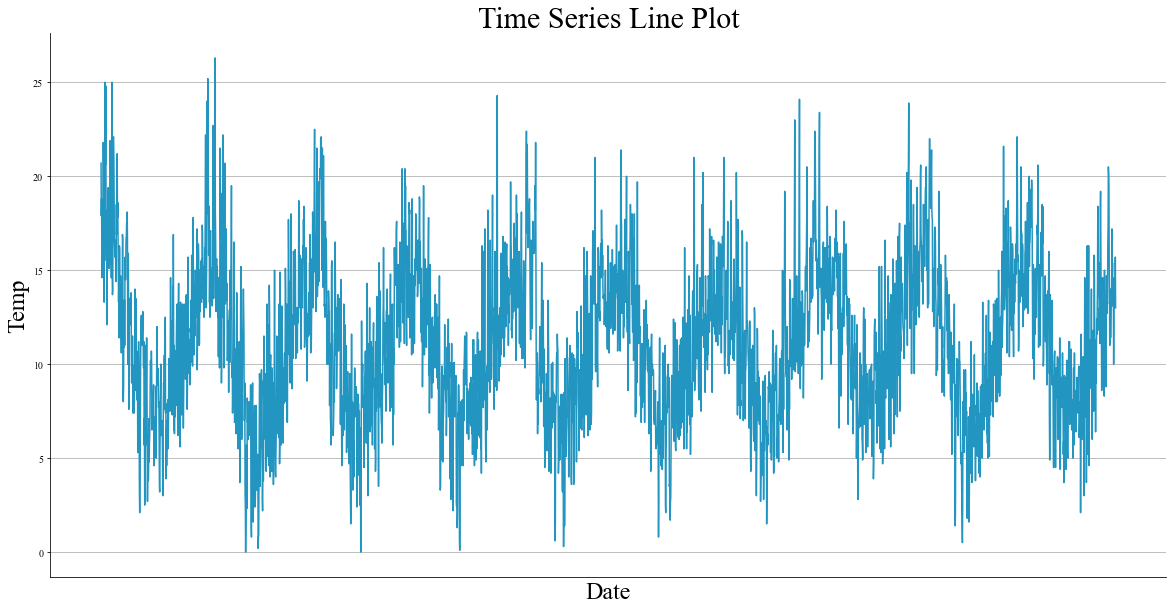

In [4]:
plt.rc('font',family='Times New Roman', size=20)    # Font setting

fig5,ax5 = plt.subplots(figsize=(20,10))
ax5.plot(TSData['Date'], TSData['Temp'], c="#2295c1")

# axis setting
ax5.set_xlabel('Date', fontsize=24)
ax5.set_ylabel('Temp', fontsize=24)
ax5.set_title('Time Series Line Plot',fontsize=30)
ax5.set_xticks([])
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

plt.grid(True)
plt.show()

### Step3. Grouping and plotting time series data.

In [5]:
TSData['year'] = pd.to_datetime(TSData['Date'], format='%Y-%m-%d').dt.year
TSData.head()

,Date,Temp,year
0,1981-1-1,20.7,1981
1,1981-1-2,17.9,1981
2,1981-1-3,18.8,1981
3,1981-1-4,14.6,1981
4,1981-1-5,15.8,1981


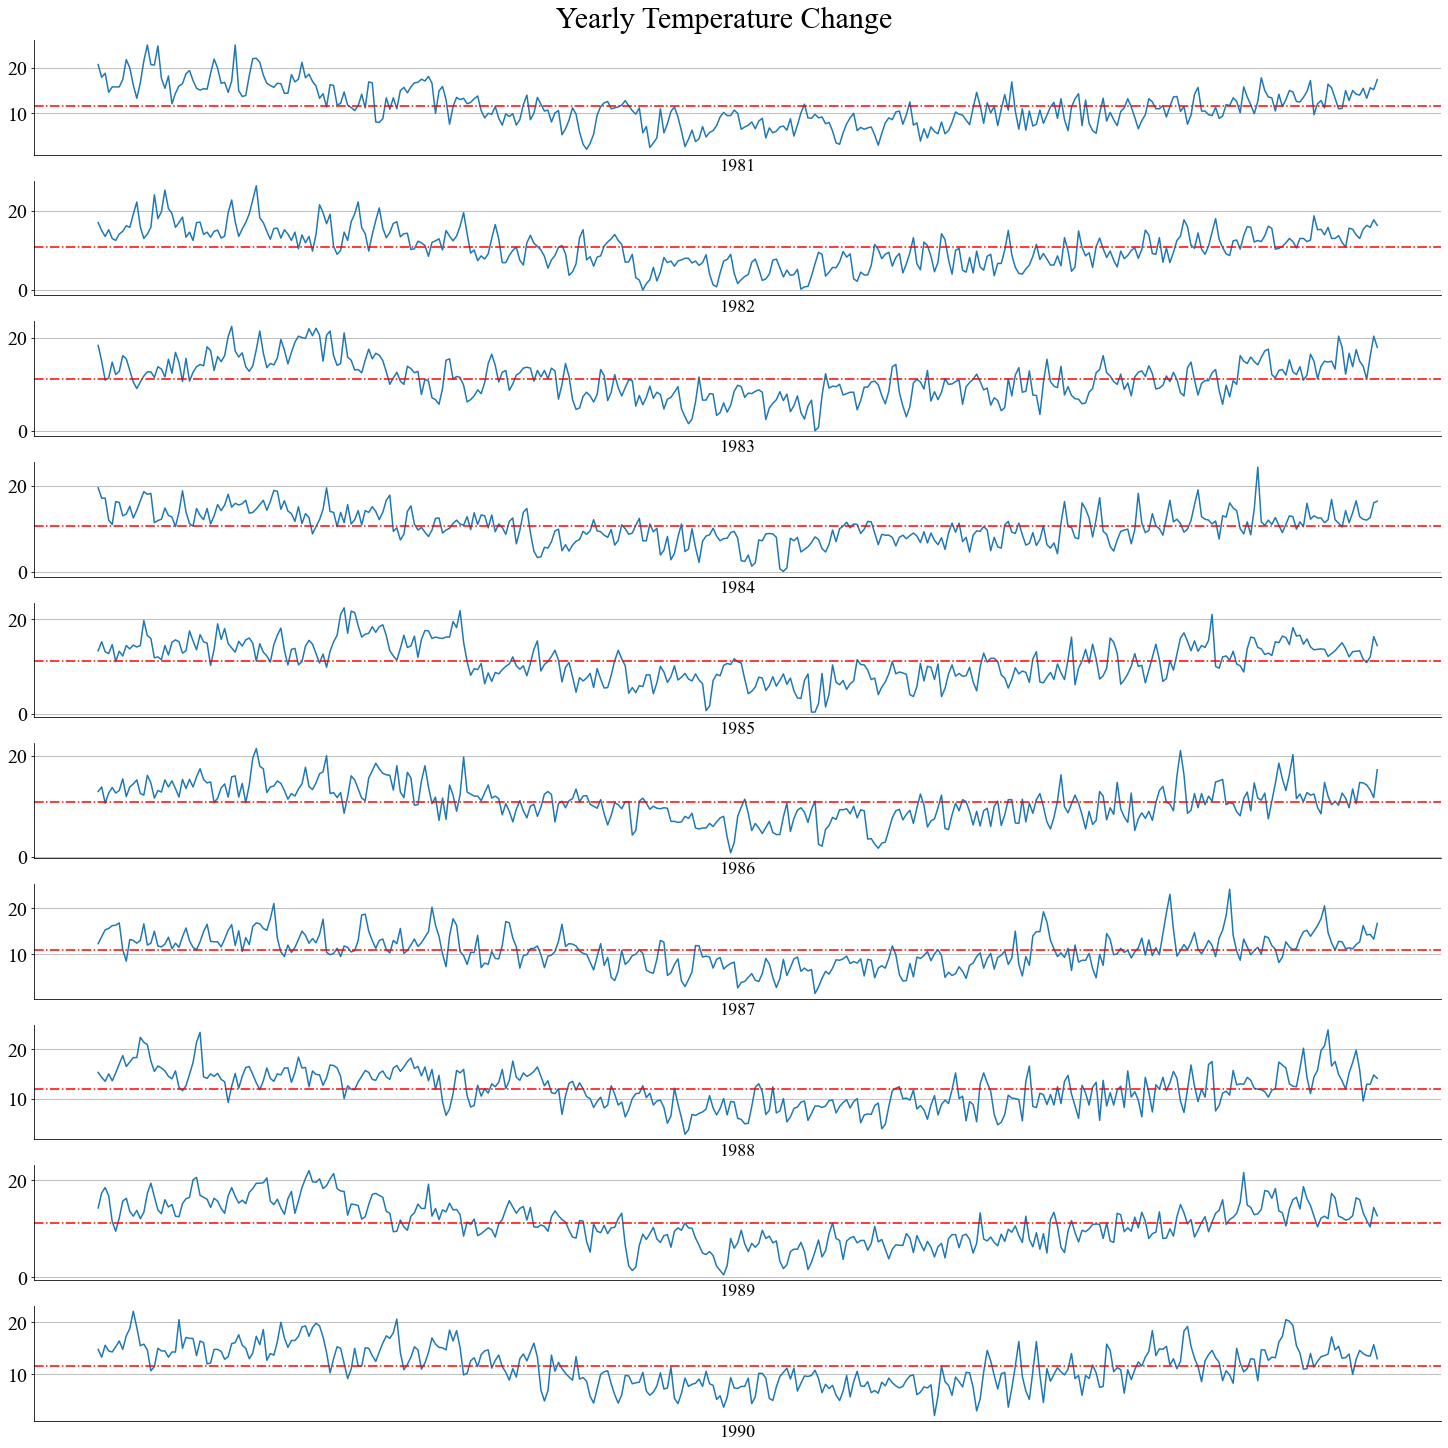

In [6]:
# Yearly temperature change
yearUnique = np.unique(TSData['year'].values)[:10]

plt.rc('font',family='Times New Roman', size=20)    # Font setting
fig6,axs6 = plt.subplots(len(yearUnique), 1, figsize=(20,20),constrained_layout=True)
fig6.suptitle('Yearly Temperature Change',fontsize=30)

for i in range(len(yearUnique)):
    # Plot temperature fluctuations for each year
    dataYear = TSData[TSData['year'].values==yearUnique[i]]['Temp']
    axs6[i].plot(dataYear)
    axs6[i].axhline(y=dataYear.mean(),c='r',linestyle='-.')
    axs6[i].set_xticks([])
    axs6[i].set_xlabel(yearUnique[i], fontsize=18)
    axs6[i].spines['right'].set_visible(False)
    axs6[i].spines['top'].set_visible(False)
    axs6[i].grid(True)

plt.show()

### Step4. Histograms & kernel density plots

Histograms & kernel density plots provide approaches for visualizing the distribution of data.<br>  


Please visit the [Histograms](https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py) for more information.  

The distribution of the example data exhibits characteristics of a **normal distribution**.

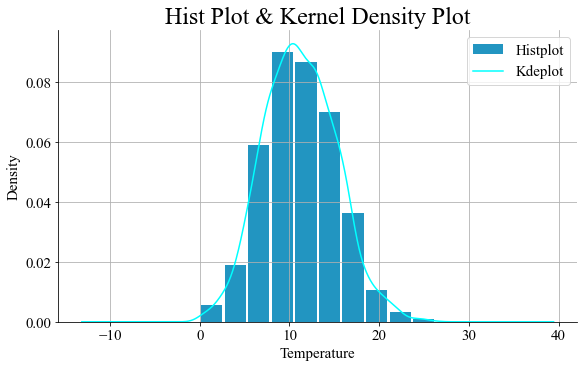

In [7]:
plt.rc('font',family='Times New Roman', size=15)    # Font setting
fig7,ax7 = plt.subplots(figsize=(8,5),constrained_layout=True)

TSData['Temp'].plot(kind='hist', density=True, label="Histplot", color="#2295c1",rwidth=0.9,ax=ax7)
TSData['Temp'].plot(kind='kde', label="Kdeplot", color='cyan', ax=ax7)

ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.set_xlabel('Temperature', fontsize=15)
ax7.set_ylabel('Density', fontsize=15)

plt.legend(fontsize=15, loc='upper right')
plt.title('Hist Plot & Kernel Density Plot',fontsize=24)
plt.grid(True)
plt.show()

### Step5. Box-and-whisker plot & violin plot
Box-and-whisker plot & violin plot show the distribution of data points after grouping by one (or more) variables. However, unlike a box plot, each violin is drawn using a kernel density estimate of the underlying distribution.<br>  


See the [Visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial) for more information.  


According to the results of our visualization, the distribution of temperature in some years exhibits characteristics of a **Gaussian Distribution**, while in other years, it it shows characteristics of a **Mixed Gaussian Distribution**.

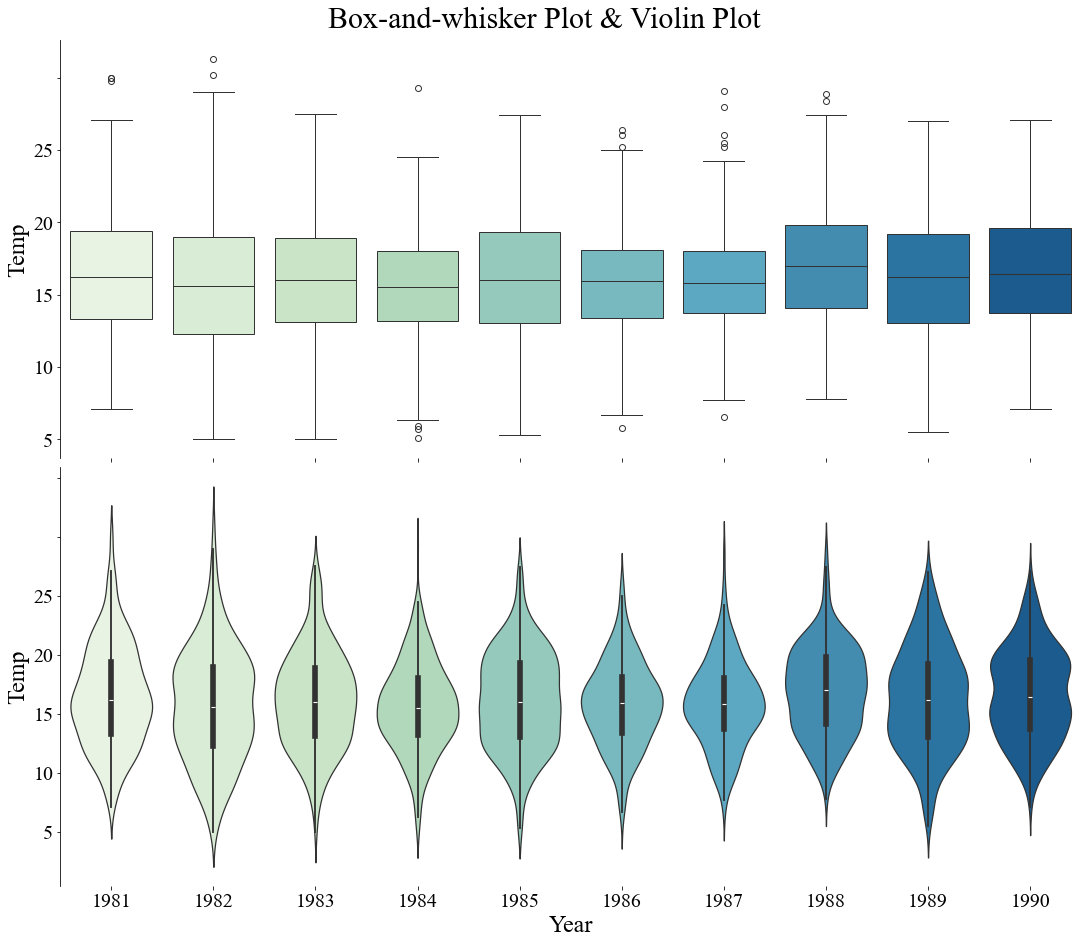

In [8]:
fig8, axs8 = plt.subplots(2,1, figsize=(15,13), sharex=True,constrained_layout=True)
fig8.suptitle('Box-and-whisker Plot & Violin Plot',fontsize=30)

# Box plot
sns.boxplot(data=TSData,x=TSData['year'], y=TSData['Temp'], palette="GnBu",ax=axs8[0])
axs8[0].set_xlabel('Year', fontsize=24)
axs8[0].set_ylabel('Temp', fontsize=24)
axs8[0].set_xticklabels(labels=yearUnique, fontsize=20)
axs8[0].set_yticklabels(labels=range(0,30,5), fontsize=20)
axs8[0].spines['right'].set_visible(False)
axs8[0].spines['top'].set_visible(False)
axs8[0].spines['bottom'].set_visible(False)

# Violin plot
sns.violinplot(data=TSData, x=TSData['year'], y=TSData['Temp'], palette="GnBu", ax=axs8[1])
axs8[1].set_xlabel('Year', fontsize=24)
axs8[1].set_ylabel('Temp', fontsize=24)
axs8[1].set_xticklabels(labels=yearUnique, fontsize=20)
axs8[1].set_yticklabels(labels=range(0,30,5), fontsize=20)
axs8[1].spines['right'].set_visible(False)
axs8[1].spines['top'].set_visible(False)
axs8[1].spines['bottom'].set_visible(False)

plt.show()

### Step6. Time series heat map
**Temperature fluctuation heat map** shows the daily changes of temperature after grouping by year.<br>  

See the [matplotlib.axes.Axes.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow) for more approaches to visualize matrix.

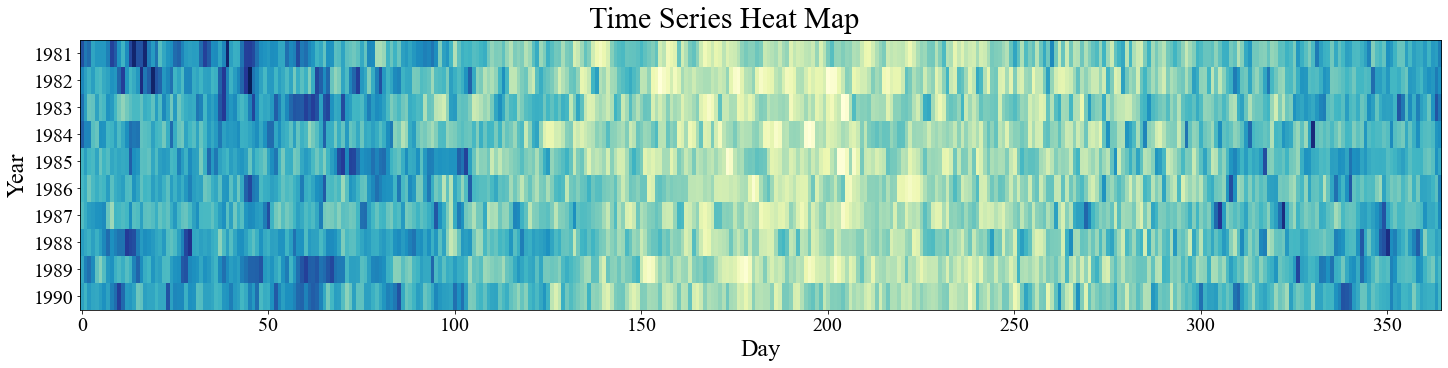

In [9]:
# Rows: year, columns: day
yearList = [TSData['Temp'][TSData['year'] == year].values for year in yearUnique]

plt.rc('font',family='Times New Roman', size=20)    # Font setting
fig9, ax9 = plt.subplots(figsize=(20,5), sharex=True,constrained_layout=True)
fig9.suptitle('Time Series Heat Map',fontsize=30)

ax9.imshow(yearList, interpolation=None, aspect='auto',cmap='YlGnBu')
ax9.set_yticks([i for i in range(10)], [str(j) for j in np.unique(TSData['year'])])
ax9.set_xlabel('Day', fontsize=24)
ax9.set_ylabel('Year', fontsize=24)
plt.show()

**Monthly temperature change of a specific year**

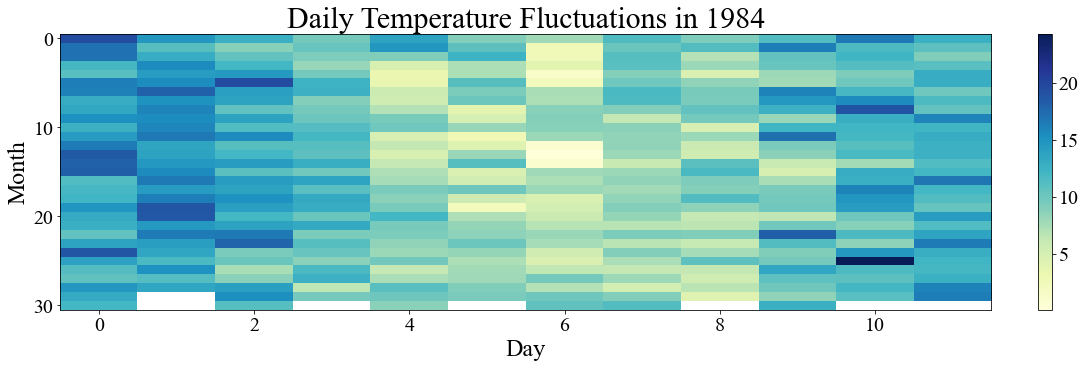

In [10]:
TSData['month'] = pd.to_datetime(TSData['Date'], format='%Y-%m-%d').dt.month

# Rows: month, columns: day
# Take 1984 as an example.
TS_1981 = TSData[TSData['year'] == 1984]
monthUnique = np.unique(TSData['month'].values)
groups = TS_1981.groupby(TSData['month'])
monthList = pd.concat([pd.DataFrame(x[1]['Temp'].values) for x in groups ], axis=1)

plt.rc('font',family='Times New Roman', size=20)    # Font setting
fig10,ax10 = plt.subplots(figsize=(15,5), constrained_layout=True)

ax10.set_title('Daily Temperature Fluctuations in 1984',fontsize=30)
im = ax10.imshow(monthList, interpolation=None, aspect='auto',cmap='YlGnBu')
cbar = fig10.colorbar(im, ax=ax10, orientation='vertical')    # Add cbar
ax10.set_xlabel('Day', fontsize=24)
ax10.set_ylabel('Month', fontsize=24)

plt.show()

### Step7. Lag plot for time series data

**Lag plots are most commonly used to look for patterns in time series data.**  

See [pandas.plotting.lag_plot](https://pandas.pydata.org/docs/reference/api/pandas.plotting.lag_plot.html) for more information.

Based on the relationship between $y_t$ & $y_{t-1}$, there is significant **autocorrelation** in temperature fuctuations.

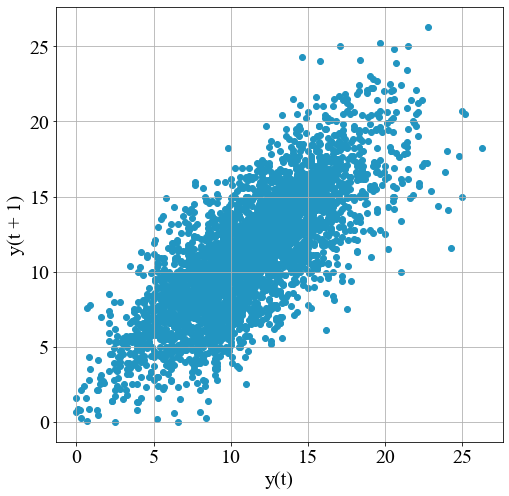

In [11]:
from pandas.plotting import lag_plot

fig11, ax11 = plt.subplots(figsize=(8,8))
plt.rc('font',family='Times New Roman', size=20)    # Font setting
lag_plot(TSData['Temp'],lag=1, ax=ax11, c="#2295c1")
ax11.grid(True)

**Visualize more lag effects.**   

As the lag increases, the significance of lag effects decreases.

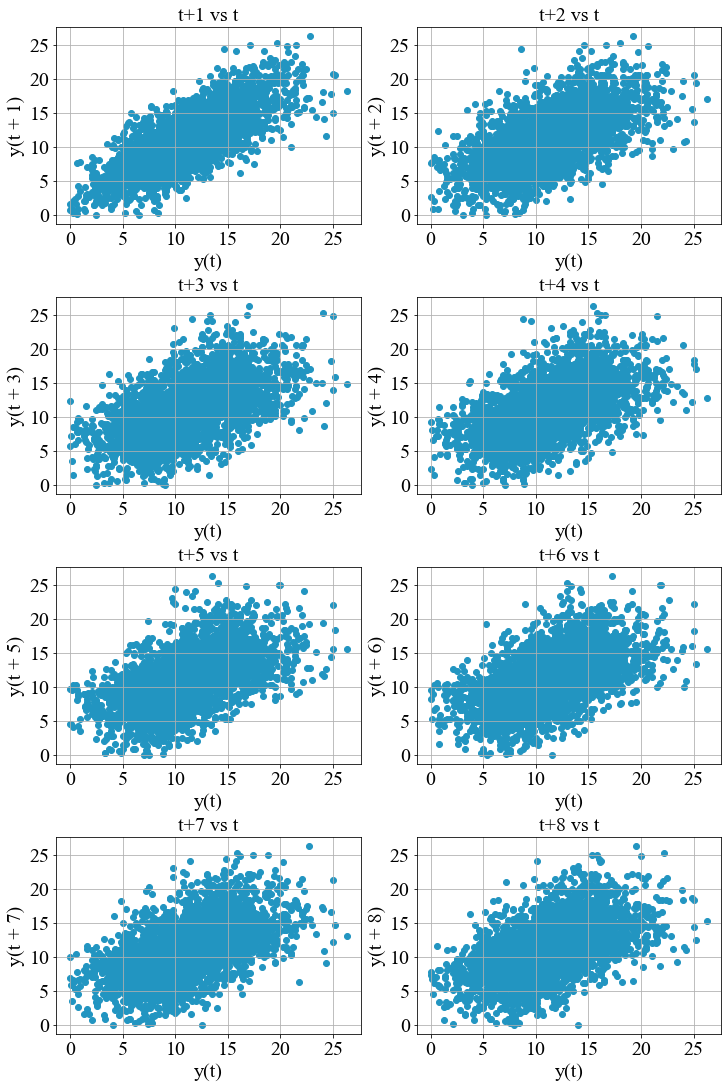

In [12]:
fig12,axs12 = plt.subplots(4,2,figsize=(10,15), constrained_layout=True)
plt.rc('font',family='Times New Roman', size=15)    # Font setting

lag_plot(TSData['Temp'], lag=1, ax=axs12[0, 0], c="#2295c1")
axs12[0, 0].set_title('t+1 vs t', fontsize=20)
axs12[0, 0].grid()

lag_plot(TSData['Temp'], lag=2, ax=axs12[0, 1], c="#2295c1")
axs12[0, 1].set_title('t+2 vs t', fontsize=20)
axs12[0, 1].grid()

lag_plot(TSData['Temp'], lag=3, ax=axs12[1, 0], c="#2295c1")
axs12[1, 0].set_title('t+3 vs t', fontsize=20)
axs12[1, 0].grid()

lag_plot(TSData['Temp'], lag=4, ax=axs12[1, 1], c="#2295c1")
axs12[1, 1].set_title('t+4 vs t', fontsize=20)
axs12[1, 1].grid()

lag_plot(TSData['Temp'], lag=5, ax=axs12[2, 0], c="#2295c1")
axs12[2, 0].set_title('t+5 vs t', fontsize=20)
axs12[2, 0].grid()

lag_plot(TSData['Temp'], lag=6, ax=axs12[2, 1], c="#2295c1")
axs12[2, 1].set_title('t+6 vs t', fontsize=20)
axs12[2, 1].grid()

lag_plot(TSData['Temp'], lag=7, ax=axs12[3, 0], c="#2295c1")
axs12[3, 0].set_title('t+7 vs t', fontsize=20)
axs12[3, 0].grid()

lag_plot(TSData['Temp'], lag=8, ax=axs12[3, 1], c="#2295c1")
axs12[3, 1].set_title('t+8 vs t', fontsize=20)
axs12[3, 1].grid()

plt.show()

### Step8. Autocorrelation plot for time series data

We apply **autocorrelation plot** in order to quantify the correlation coefficient against the lag.
- The horizontal lines in the plot correspond to 95% and 99% confidence bands.  
- The dashed line is 99% confidence band.  

ACF plots are a commonly-used tool for checking randomness in a dataset, and usually applied to determine the number of lags in the **model identification** stage, as will be discussed in the upcoming tutorial.

For more information, see the <br>
[pandas.plotting.autocorrelation_plot](https://pandas.pydata.org/docs/reference/api/pandas.plotting.autocorrelation_plot.html)   &  [statsmodels.graphics.tsaplots.plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)

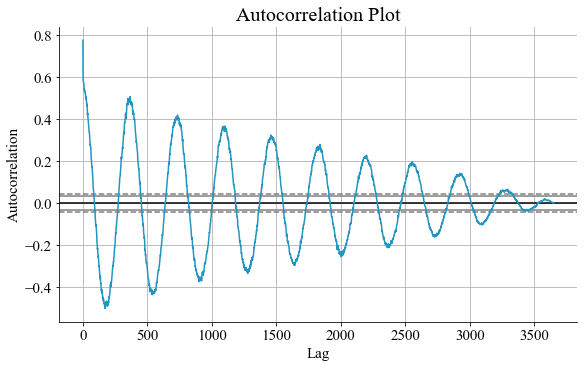

In [13]:
from pandas.plotting import autocorrelation_plot

fig13,ax13 = plt.subplots(figsize=(8,5), constrained_layout=True)
plt.rc('font',family='Times New Roman', size=15)    # Font setting

ax13.set_title('Autocorrelation Plot',fontsize=20)
autocorrelation_plot(TSData['Temp'],ax=ax13, color="#2295c1")
ax13.spines['right'].set_visible(False)
ax13.spines['top'].set_visible(False)

plt.show()

**Plots lags on the horizontal and the correlations on vertical axis.**

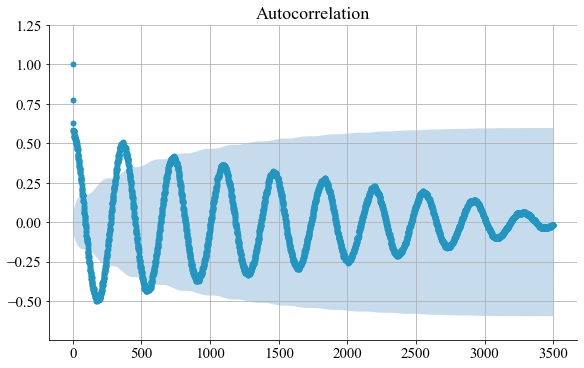

In [14]:
import statsmodels.api as sm

fig14,ax14 = plt.subplots(figsize=(8,5), constrained_layout=True)
plt.rc('font',family='Times New Roman', size=15)    # Font setting

sm.graphics.tsa.plot_acf(TSData['Temp'], 
                         use_vlines=False, 
                         lags=3500,
                         alpha=0.05,
                         ax=ax14, 
                         auto_ylims=True, 
                         color="#2295c1")
ax14.spines['right'].set_visible(False)
ax14.spines['top'].set_visible(False)
ax14.grid()

The difference between the two approaches we mentioned above:
- In pandas, coefficients are calculated using the mean and variance of sub-sequence.
- In stats model, coefficients are calculated utilizing the population mean and variance.